**HEART DISEASE DATASET**

Feature --> Description

Age --> Age in years

Sex --> 1 = Male, 0 = Female

ChestPainType --> Type of chest pain experienced (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)

RestingBP --> Resting blood pressure (mm Hg)

Cholesterol --> Serum cholesterol level (mg/dl)

FastingBS --> Fasting blood sugar (>120 mg/dl) (1 = True, 0 = False)

RestingECG --> Resting electrocardiographic results (0: Normal, 1: ST-T Wave Abnormality, 2: Left ventricular hypertrophy)

MaxHR --> Maximum heart rate achieved

ExerciseAngina --> Exercise-induced angina (1 = Yes, 0 = No)

OldPeak	--> ST depression induced by exercise

SlopePeakExercise --> Slope of the peak exercise ST segment

NumMajorVessels --> Number of major vessels (0-3) colored by fluoroscopy

Thalium --> Thalium stress test (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)

Condition (Target) --> 1 = Heart Disease Present, 0 = No Disease

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv('heart.csv')
df.rename(columns={
        'age' : 'Age',
        'sex' : 'Sex',
        'cp' : 'ChestPainType',
        'trestbps' : 'RestingBP',
        'chol' : 'Cholesterol',
        'fbs' : 'FastingBS',
        'restecg' : 'RestingECG',
        'thalach' : 'MaxHR',
        'exang' : 'ExerciseAngina',
        'oldpeak' : 'OldPeak',
        'slope' : 'SlopePeakExercise',
        'ca' : 'NumMajorVessels',
        'thal' : 'Thalium',
        'target' : 'Condition'
        }, inplace=True)

sns.set(style='whitegrid')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,OldPeak,SlopePeakExercise,NumMajorVessels,Thalium,Condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Model Accuracy on Test Set: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



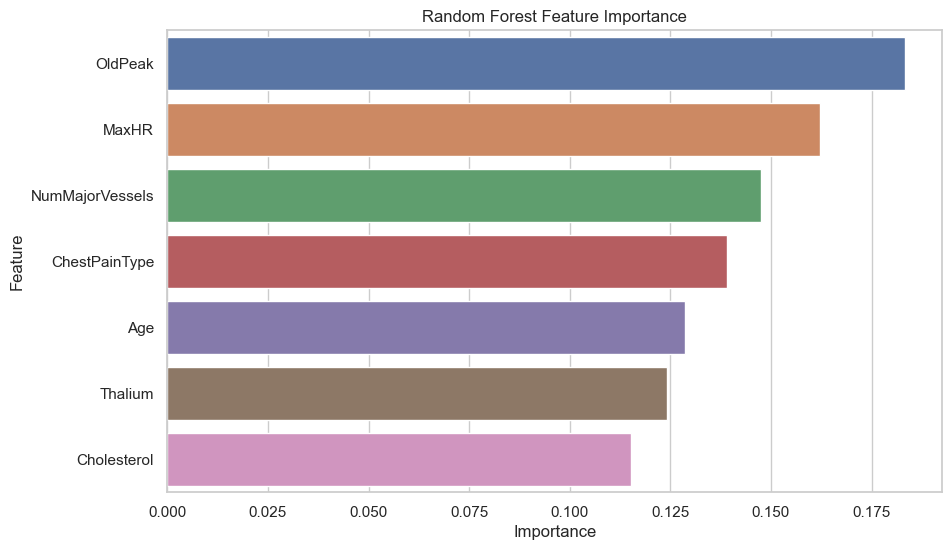

In [3]:
# Based on feature importance, we select the top features

selected_features = ['ChestPainType', 'MaxHR', 'OldPeak', 'Thalium', 
                     'Cholesterol', 'NumMajorVessels', 'Age']

# Prepare the data
X = df[selected_features]
y = df['Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the RandomForest model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

def plot_rf_feature_importance(model, features):
    importance = model.feature_importances_
    feature_names = features.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Random Forest Feature Importance')
    plt.show()

# Plot feature importance for the selected model
plot_rf_feature_importance(model, X_train)

In [ ]:
def get_valid_input(prompt, min_value, max_value):
    while True:
        try:
            value = float(input(prompt))
            if value < min_value or value > max_value:
                print(f"Please enter a value between {min_value} and {max_value}.")
            else:
                return value
        except ValueError:
            print("Invalid input! Please enter a valid number.")

while True:
    print("\nWelcome to CureZea Heart Disease Predictor! \nPlease enter the following values for the patient:")

    # User input with improved questions and explanations
    exercise_angina = get_valid_input("\nDoes the patient experience chest pain during physical activity? (Enter 0 = No, 1 = Yes): ", 0, 1)
    chest_pain = get_valid_input("\nWhat type of chest pain does the patient experience? (Enter a number between 0 and 3. \n0 = No pain, 1 = Typical angina (chest pain due to heart problems), 2 = Atypical angina (pain from other causes), 3 = Non-anginal pain (not related to heart)): ", 0, 3)
    st_depression = get_valid_input("\nHow much ST depression is observed in the patient's ECG? (Enter a value between 0.0 and 6.2): ", 0.0, 6.2)
    max_heart_rate = get_valid_input("\nWhat was the patient's maximum heart rate during exercise? (Enter a value between 70 and 200 beats per minute): ", 70, 200)
    thallium_test = get_valid_input("\nWhat was the result of the thallium stress test? (Enter a number between 0 and 3. \n0 = Normal, 1 = Abnormal, 2 = Borderline, 3 = Severe): ", 0, 3)
    cholesterol = get_valid_input("\nWhat is the patient's cholesterol level? (Enter a value between 100 and 600 mg/dL): ", 100, 600)
    num_major_vessels = get_valid_input("How many major blood vessels are affected by heart disease? (Enter a number between 0 and 3): ", 0, 3)
    age = get_valid_input("\nHow old is the patient? (Enter a value between 20 and 80 years): ", 20, 80)

    # Show entered data for confirmation
    print("\nEntered Data:")
    print(f"Exercise induced angina: {exercise_angina}")
    print(f"Chest pain type: {chest_pain}")
    print(f"ST depression: {st_depression}")
    print(f"Max heart rate: {max_heart_rate}")
    print(f"Thallium test result: {thallium_test}")
    print(f"Cholesterol: {cholesterol}")
    print(f"Number of major vessels: {num_major_vessels}")
    print(f"Age: {age}")
    
    confirmation = input("\nPlease confirm the above details correct? (yes/no): ")
    if confirmation.lower() != 'yes':
        print("Please re-enter the details.")
        continue
    
    # Predict the result
    patient_data = [exercise_angina, chest_pain, st_depression, thallium_test, cholesterol, num_major_vessels, age]
    patient_df = pd.DataFrame([patient_data], columns=selected_features)
    patient_scaled = scaler.transform(patient_df)

    prediction = model.predict(patient_scaled)
    probability = model.predict_proba(patient_scaled)[0][1]

    print("\nResults:")
    print(f"Probability of heart disease: {round(probability, 2)}")
    if probability >= 0.70:
        print("Interpretation: Potential risk of heart disease.")
        print("Recommendation: Please consult a healthcare provider for further tests and evaluation.")
    else:
        print("Interpretation: No heart disease.")
        print("Recommendation: Maintain a healthy lifestyle and don't forget regular check-ups.")
    
    continue_prompt = input("\nDo you want to predict for another patient? (yes/no/exit): ")
    if continue_prompt.lower() in ['no', 'exit']:
        print("Exiting the system. Thank you!")
        break



Welcome to CureZea Heart Disease Predictor! 
Please enter the following values for the patient:

Does the patient experience chest pain during physical activity? (Enter 0 = No, 1 = Yes): yes
Invalid input! Please enter a valid number.

Does the patient experience chest pain during physical activity? (Enter 0 = No, 1 = Yes): 1

What type of chest pain does the patient experience? (Enter a number between 0 and 3. 
0 = No pain, 1 = Typical angina (chest pain due to heart problems), 2 = Atypical angina (pain from other causes), 3 = Non-anginal pain (not related to heart)): w
Invalid input! Please enter a valid number.


In [ ]:
# Final Model Version
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tkinter as tk
from tkinter import ttk, messagebox

# Load and preprocess the data (same as before)
df = pd.read_csv('heart.csv')
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'OldPeak',
    'slope': 'SlopePeakExercise',
    'ca': 'NumMajorVessels',
    'thal': 'Thalium',
    'target': 'Condition'
}, inplace=True)

# Selected features based on importance
selected_features = ['ChestPainType', 'MaxHR', 'OldPeak', 'Thalium', 
                     'Cholesterol', 'NumMajorVessels', 'Age']

# Prepare the data
X = df[selected_features]
y = df['Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the RandomForest model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model (optional print for debugging)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Tkinter GUI class
class HeartPredictorApp:
    def __init__(self, root):
        #Establish the caracteristiques of the window
        self.root = root
        self.root.title("CureZea Heart Disease Predictor")
        self.root.geometry("750x700")
        self.root.configure(bg="#f0f0f0")
        self.root.resizable(False, False)

        # Configure root to expand
        self.root.grid_rowconfigure(0, weight=1)
        self.root.grid_columnconfigure(0, weight=1)

        # Main container frame
        self.main_frame = tk.Frame(self.root, bg="#f0f0f0")
        self.main_frame.grid(row=0, column=0, sticky="nsew", padx=10, pady=10)

        # Configure main frame to expand
        self.main_frame.grid_rowconfigure(1, weight=1)  # Input frame row
        self.main_frame.grid_rowconfigure(3, weight=2)  # Result text row
        self.main_frame.grid_columnconfigure(0, weight=1)

        # Title Label
        tk.Label(self.main_frame, text="Heart Disease Prediction", font=("Arial", 20, "bold"), 
                 bg="#f0f0f0", fg="#333").grid(row=0, column=0, pady=10, sticky="ew")

        # Frame for input fields
        self.input_frame = tk.Frame(self.main_frame, bg="#f0f0f0")
        self.input_frame.grid(row=1, column=0, pady=10, sticky="nsew")

        # Configure input frame to expand and center
        self.input_frame.grid_columnconfigure(0, weight=1)
        self.input_frame.grid_columnconfigure(1, weight=0)  # Fixed column for entries
        self.input_frame.grid_columnconfigure(2, weight=1)

        # Input fields and labels
        self.entries = {}
        self.create_input_fields()

        # Creating a frame to place the Buttons
        button_frame = tk.Frame(self.main_frame, bg="#f0f0f0")
        button_frame.grid(row=2, column=0, pady=20, sticky="ew")
        button_frame.grid_columnconfigure((0, 1, 2), weight=1)

        #Establishing the actual buttons
        tk.Button(button_frame, text="Predict", command=self.predict, 
                  bg="#008000", fg="white", font=("Arial", 12), width=20, height=5).grid(row=0, column=0, padx=10)
        tk.Button(button_frame, text="Clear", command=self.clear_fields, 
                  bg="#FF0000", fg="white", font=("Arial", 12), width=20, height=5).grid(row=0, column=1, padx=10)
        tk.Button(button_frame, text="Exit", command=self.root.quit, 
                  bg="#808080", fg="white", font=("Arial", 12), width=20, height=5).grid(row=0, column=2, padx=10)

        # Result Text Area
        self.result_text = tk.Text(self.main_frame, height=6, width=50, font=("Arial", 12), state="disabled")
        self.result_text.grid(row=3, column=0, pady=20, padx=20, sticky="nsew")

    def create_input_fields(self):
        #create the tags, description and ranges of each parameter
        fields = [
            ("Chest Pain Type (0-3):", "0 = No pain, 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain", (0, 3)),
            ("Max Heart Rate (70-200):", "Maximum heart rate during exercise (beats per minute)", (70, 200)),
            ("Old Peak (0.0-6.2):", "ST depression observed in ECG", (0.0, 6.2)),
            ("Thalium Test (0-3):", "0 = Normal, 1 = Abnormal, 2 = Borderline, 3 = Severe", (0, 3)),
            ("Cholesterol (100-600):", "Cholesterol level in mg/dL", (100, 600)),
            ("Num Major Vessels (0-3):", "Number of major blood vessels affected", (0, 3)),
            ("Age (20-80):", "Patient's age in years", (20, 80))
        ]

        for i, (label_text, tooltip, range_vals) in enumerate(fields):
            # Create labels and entry without a sub-frame, directly in the input_frame
            tk.Label(self.input_frame, text=label_text, font=("Arial", 12), bg="#f0f0f0", anchor="w").grid(row=i, column=0, sticky="e", padx=5, pady=5)
            entry = tk.Entry(self.input_frame, font=("Arial", 12), width=10)
            entry.grid(row=i, column=1, padx=5, pady=5)
            tk.Label(self.input_frame, text=tooltip, font=("Arial", 10, "italic"), bg="#f0f0f0", fg="#666", anchor="w").grid(row=i, column=2, sticky="w", padx=5, pady=5)
            self.entries[label_text] = (entry, range_vals)

    #Make sure the inputs are correct
    def validate_inputs(self):
        patient_data = []
        for label, (entry, (min_val, max_val)) in self.entries.items():
            try:
                value = float(entry.get())
                #If the input value does not go with the ranges
                if value < min_val or value > max_val:
                    #error message
                    messagebox.showerror("Input Error", f"{label} must be between {min_val} and {max_val}")
                    return None
                patient_data.append(value)
            except ValueError:
                messagebox.showerror("Input Error", f"Invalid input for {label}. Please enter a valid number.")
                return None
        return patient_data

    #the actual prediction of the model
    def predict(self):
        patient_data = self.validate_inputs()
        if patient_data is None:
            return

        # Prepare data for prediction
        patient_df = pd.DataFrame([patient_data], columns=selected_features)
        patient_scaled = scaler.transform(patient_df)

        # Make prediction
        prediction = model.predict(patient_scaled)
        probability = model.predict_proba(patient_scaled)[0][1]

        # Display results
        self.result_text.config(state="normal")
        self.result_text.delete(1.0, tk.END)
        self.result_text.insert(tk.END, f"Probability of Heart Disease: {round(probability, 2)}\n\n")
        
        if probability >= 0.70:
            self.result_text.insert(tk.END, "Interpretation: Potential risk of heart disease.\n")
            self.result_text.insert(tk.END, "Recommendation: Consult a healthcare provider for further tests.")
        else:
            self.result_text.insert(tk.END, "Interpretation: No heart disease.\n")
            self.result_text.insert(tk.END, "Recommendation: Maintain a healthy lifestyle and regular check-ups.")
        
        self.result_text.config(state="disabled")

    #Clear the inputs and the output boxes
    def clear_fields(self):
        #clear the text
        for _, (entry, _) in self.entries.items():
            entry.delete(0, tk.END)
        self.result_text.config(state="normal")
        self.result_text.delete(1.0, tk.END)
        self.result_text.config(state="disabled")

# Run the application
if __name__ == "__main__":
    root = tk.Tk()
    app = HeartPredictorApp(root)
    root.mainloop()